In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../summary_data/original/all_tools_TRB_reads.csv")
df

,Sample,tissue,tissue_type,repertoire_type,class,total_reads_TCR,total_reads_tool,total_reads_RNA_seq,tool,TCR_derived_by_RNA_seq_tool
0,SRR5233637,small_intestine,T_cell_poor,high_SDI,T_cell_poor_high_SDI,3047629.0,84.0,72720367,MIXCR,1.155110
1,SRR5233639,lymph_node,T_cell_rich,high_SDI,T_cell_rich_high_SDI,3256697.0,1346.0,65998918,MIXCR,20.394274
2,TCGA-CZ-4862,kidney,T_cell_poor,high_SDI,T_cell_poor_high_SDI,16784.0,0.0,58529923,MIXCR,0.000000
3,TCGA-CZ-5463,kidney,T_cell_poor,high_SDI,T_cell_poor_high_SDI,806.0,0.0,122632451,MIXCR,0.000000
4,TCGA-CZ-5985,kidney,T_cell_poor,high_SDI,T_cell_poor_high_SDI,12998.0,0.0,83862519,MIXCR,0.000000
...,...,...,...,...,...,...,...,...,...,...
71,sample10,melanoma,T_cell_poor,high_SDI,T_cell_poor_high_SDI,1769522.0,1972.0,63320771,CATT,31.143019
72,sample11,melanoma,T_cell_poor,high_SDI,T_cell_poor_high_SDI,1006220.0,1739.0,55727841,CATT,31.205228
73,sample12,melanoma,T_cell_poor,high_SDI,T_cell_poor_high_SDI,292828.0,4985.0,107919183,CATT,46.191973
74,sample13,melanoma,T_cell_poor,low_SDI,T_cell_poor_low_SDI,12954.0,5052.0,80622502,CATT,62.662407


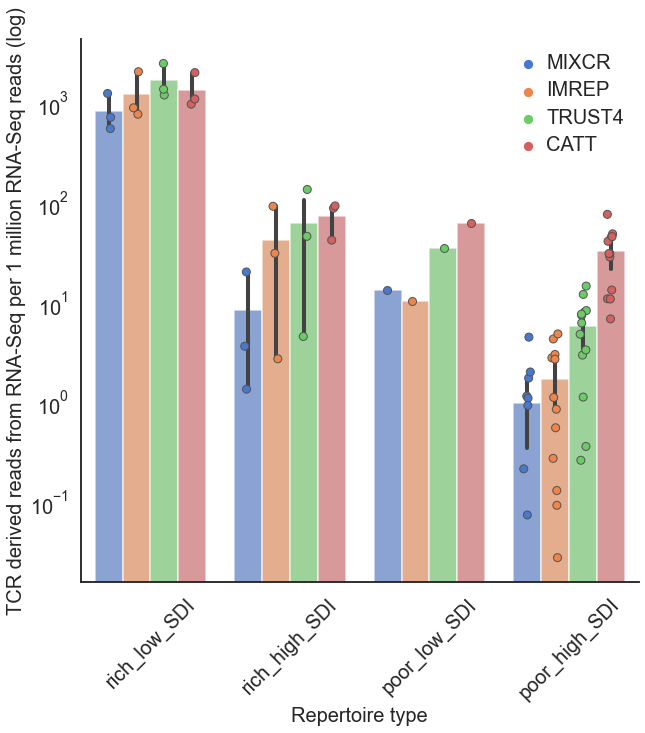

In [3]:
# Number of TCR derived reads by RNA-Seq based methods per 1 million RNA-Seq reads in different repertoire types
repertoire_classes = ['T_cell_rich_low_SDI','T_cell_rich_high_SDI','T_cell_poor_low_SDI','T_cell_poor_high_SDI']
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (10,10))

ax = sns.barplot(x='class',y='TCR_derived_by_RNA_seq_tool',hue='tool',data=df,palette='muted',
                 order=repertoire_classes,alpha=0.7)
sns.stripplot(x="class",y="TCR_derived_by_RNA_seq_tool",data=df,s=8,color=".3",palette="muted",hue='tool',
              dodge=True,linewidth=1,order=repertoire_classes)
ax.set(xticklabels=["rich_low_SDI", "rich_high_SDI", "poor_low_SDI", "poor_high_SDI"])

ax.set_xlabel('Repertoire type',fontsize=20)
ax.set_ylabel('TCR derived reads from RNA-Seq per 1 million RNA-Seq reads (log)',fontsize=20)
ax.set_yscale("log")

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1, 1), handletextpad=0.1, frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=20) 
plt.setp(ax.get_legend().get_title(), fontsize=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
sns.despine()

plt.savefig("../figures/supplementary/figureS4.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS4.png",bbox_inches="tight")

plt.show()